## [117-Populating Next Right Pointers in Each Node II](https://leetcode.com/problems/populating-next-right-pointers-in-each-node-ii/)

问题难度： &clubs; &clubs; &clubs;

### 问题描述

给定一个二叉树：
```
struct TreeLinkNode {
  TreeLinkNode *left;
  TreeLinkNode *right;
  TreeLinkNode *next;
}
```

将节点的每一个`next`指针指向其右边的节点。如果没有下一个右边的节点，`next`指针应该被设置为`NULL`。

初始地，所有的`next`指针被设置为`NULL`。

注意：

- 我们只能使用固定的额外空间。
- 可以使用递归的方法，在这个问题中，隐式的栈空间不会被计算为额外的空间。

**示例**：

给定下面的二叉树：
```
    1
   /  \
  2    3
 / \    \
4   5    7
```
在调用函数之后，树应该成为：
```
    1 -> NULL
   /  \
  2 -> 3 -> NULL
 / \    \
4-> 5 -> 7 -> NULL
```

### 解题思路

本题按照层次的方法进行遍历，使用`cur_stack`来存储当前层，使用`next_stack`来存储下一层,直到下一层中不再有节点为止，针对每一层，遍历该层的节点，将当前节点的`right`设置为列表中的下一个值即可。

问题就变成了怎么从当前层得到下一层：针对当前层的每一个节点，当节点的`left`和`right`节点添加到下一层即可。

### 代码

In [19]:
# Definition for binary tree with next pointer.
class TreeLinkNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        self.next = None

class Solution:
    # @param root, a tree link node
    # @return nothing
    def connect(self, root):
        def helper(cur_stack):
            next_stack = []
            for i in range(len(cur_stack) - 1):
                node = cur_stack[i]
                node.next = cur_stack[i+1]
                if node.left is not None:
                    next_stack.append(node.left)
                if node.right is not None:
                    next_stack.append(node.right)
            if cur_stack[-1].left is not None:
                next_stack.append(cur_stack[-1].left)
            if cur_stack[-1].right is not None:
                next_stack.append(cur_stack[-1].right)
            cur_stack[-1].next = None
            if len(next_stack) > 0:
                helper(next_stack)
        if root is None:
            return
        helper([root])

In [31]:
s = Solution()
root = TreeLinkNode(1)
a = TreeLinkNode(2)
b = TreeLinkNode(3)
c = TreeLinkNode(4)
d = TreeLinkNode(5)
e = TreeLinkNode(7)

root.left = a
root.right = b
a.left = c
a.right = d
b.right = e

s.connect(root)

cur_stack = [root]
while len(cur_stack) > 0:
    next_stack = []
    for node in cur_stack:
        if node.left is not None:
            next_stack.append(node.left)
        if node.right is not None:
            next_stack.append(node.right)
    start = cur_stack[0]
    ans = ""
    while start is not None:
        ans += str(start.val) + " "
        start = start.next
    print(ans)
    cur_stack = next_stack

AttributeError: 'Solution' object has no attribute 'connect'

## [118-Pascal's Triangle](https://leetcode.com/problems/pascals-triangle/)

问题难度： &clubs;

### 问题描述

给定一个非负整数`numRows`，生成前`numRows`的`Pascal`三角形。

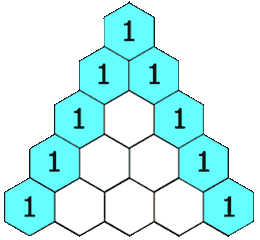
在`Pascal`的三角形中，每个数都是其上面两个数之和。

**示例**：
```
Input: 5
Output:
[
     [1],
    [1,1],
   [1,2,1],
  [1,3,3,1],
 [1,4,6,4,1]
]
```

### 解题思路

找一下规律，针对第`i`行，有`i+1`个数字，需要填充`1`到`i-1`个数值，其中`s[i][j] = s[i-1][j-1] + s[i-1][j]`。

### 代码


In [22]:
class Solution(object):
    def generate(self, numRows):
        """
        :type numRows: int
        :rtype: List[List[int]]
        """
        ans = []
        for i in range(numRows):
            now_ans = [1 for _ in range(i+1)]
            for j in range(1, i):
                now_ans[j] = ans[i-1][j-1] + ans[i-1][j]
            ans.append(now_ans)
        return ans

）## [119-Pascal's Triangle II](https://leetcode.com/problems/pascals-triangle-ii/)

问题难度： &clubs; 

### 问题描述

给定一个非负的索引`k`,其中`k ≤ 33`，返回`Pascal`三角形的第`k`行。

**注意：行的索引从`0`开始**。

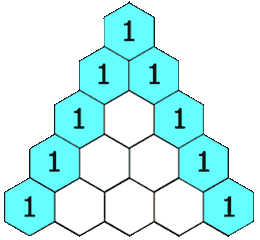

在`Pascal`的三角形中，每个数都是其上面两个数之和。

**示例**
```
Input: 3
Output: [1,3,3,1]
```
进一步：
是否可以将算法优化到只使用`O(k)`的额外空间？

### 解题思路

最简单的方法还是从`i=0`开始遍历一直到`k`，当然，只需要保留上一行的信息即可。空间复杂度为`O(2k)`

这里要求只使用`O(k)`的空间，其实只要把上一层的数据暂存到最终的列表即可。

特别注意：需要单独存储一下覆盖之前的值。

In [24]:
class Solution(object):
    def getRow(self, rowIndex):
        """
        :type rowIndex: int
        :rtype: List[int]
        """
        ans = [1 for _ in range(rowIndex+1)]
        for i in range(rowIndex + 1):
            pre_j = ans[0]
            for j in range(1, i):
                tmp = ans[j]
                ans[j] = pre_j + ans[j]
                pre_j = tmp
        return ans

## [120- Triangle](https://leetcode.com/problems/triangle/)

问题难度： &clubs; &clubs; &clubs;

### 问题描述

给定一个三角形，找到从顶部到底部的最短路径，每一步只能跳转到下一行邻近的数字。

例如，给定下面的三角形：
```
[
     [2],
    [3,4],
   [6,5,7],
  [4,1,8,3]
]
```
自顶向下最短的路径之和为 `11` (路径如下： `2 + 3 + 5 + 1 = 11`).

**注意**

如果可以只使用 `O(n)`的额外空间的话，可以额外加分，其中` n `是三角形的总行数。

### 解题思路

分析一下，感觉这一题和上面两题思路差不多。我们可以一行一行地进行处理，`i`从`0`到`n`, 更新`ans`中`0`到`i`的值，可以发现：针对第`i`行第`j`个数，主要依赖于`ans[i-1][j-1]+triangle[j]`或者`ans[i-1][j]+triangle[j]`中的较小值。最后获取`ans`中的最小值即可。

### 代码


In [25]:
class Solution(object):
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        n = len(triangle)
        ans = [0 for _ in range(n)]
        for i in range(n):
            pre_j = ans[0]
            ans[0] = ans[0] + triangle[i][0]
            for j in range(1, i):
                tmp = ans[j]
                min_val = pre_j if pre_j < ans[j] else ans[j]
                ans[j] = triangle[i][j] + min_val
                pre_j = tmp
            ans[i] = pre_j + triangle[i][-1]
        min_val = ans[0]
        for i in range(n):
            if ans[i] < min_val:
                min_val = ans[i]
        return min_val

## [121-Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/)

问题难度： &clubs;

### 问题描述

假设我们有一个数组，它的第`i`个元素为一个给定股票在第`i`天的价格。

如果我们最多只能交易一次（也就是说：购买和卖出一只股票），设计一个算法找到最大的利润值。

**注意：在购买股票之前你不能售出。**

**示例1**
```
Input: [7,1,5,3,6,4]
Output: 5
解释: 在第2天购买 (price = 1) 在第5天售出 (price = 6), 利润为 6-1 = 5.
             而不是 7-1 = 6, 因为售出价格必须在购买价格之前。
```

**示例2**

```
Input: [7,6,4,3,1]
Output: 0
解释: 在这种情况下,不能进行任何交易。也就是说利润为 0。
```

### 解题思路

感觉这道题目需要考察最大的差值，在这里，可以使用一个变量`min_val`存储到目前为止的最小值，`max_profit`存储最大的差值，然后从前向后遍历，判断当前值和`min_val`的大小比较以及`cur-min_val`与`max_profit`的大小比较。

### 代码

In [27]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        max_profit = 0
        if len(prices) <= 0:
            return max_profit
        min_val = prices[0]
        for i in range(1, len(prices)):
            if min_val >= prices[i]:
                min_val = prices[i]
            else:
                now_profit = prices[i] - min_val
                if now_profit > max_profit:
                    max_profit = now_profit
        return max_profit
        

## [122-Best Time to Buy and Sell Stock II](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/)

问题难度： &clubs;

### 问题描述

假设我们有一个数组，它的第`i`个元素为一个给定股票在第`i`天的价格。

如果我们可以交易任意次数（也就是说：多次购买和卖出一只股票），设计一个算法找到最大的利润值。

**注意：一次性最多只能同时拥有一只股票。**

**示例1**
```
Input: [7,1,5,3,6,4]
Output: 7
解释: 在第2天购买 (price = 1)，然后在第3天卖出 (price = 5),利润为： 5-1 = 4。
    然后在第4天购买 (price = 3) 并且在第5天卖出 (price = 6), 利润为 6-3 = 3.
```

**示例2**
```
Input: [1,2,3,4,5]
Output: 4
解释: 在第1天购买 (price = 1)， 然后在第5天卖出 (price = 5), 利润为 = 5-1 = 4.
    注意：我们不能在第1天购买, 第2天购买 然后再卖出,因为我们不能同时参与多项交易。在购买之前必须先卖出。
```

**示例3**
```
Input: [7,6,4,3,1]
Output: 0
解释: 在这种情况下,不能进行任何交易。也就是说利润为 0。
```

### 解题思路

这道题在上一道题的基础上做了一些改变： 可以中间卖出再买入。

在遍历的时候，如果列表一直是升序排列，则不做任何处理，否则的话需要中断，然后再计算下一段的值。

### 代码

In [30]:
class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        max_profit = 0
        if len(prices) <= 0:
            return max_profit
        min_val = prices[0]
        for i in range(1, len(prices)):
            if min_val >= prices[i]:
                max_profit += prices[i-1] - min_val
                min_val = prices[i]
            elif prices[i] < prices[i-1]:
                max_profit += prices[i-1] - min_val
                min_val = prices[i]
        if prices[-1] > min_val:
            max_profit += prices[-1] - min_val
        return max_profit

### [123- Best Time to Buy and Sell Stock III](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-iii/)

问题难度： &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

假设我们有一个数组，它的第`i`个元素为一个给定股票在第`i`天的价格。

如果我们可以交易**最多两次**，设计一个算法找到最大的利润值。

**注意：一次性最多只能同时拥有一只股票。**

**示例1**
```
Input: [3,3,5,0,0,3,1,4]
Output: 6
解释: 在第4天购买 (price = 0)， 然后在第6天卖出 (price = 3), 利润为： 3-0 = 3.
    在第7天购买 (price = 1)， 然后在第8天卖出 (price = 4), 利润为 4-1 = 3.
```

**示例2**
```
Input: [1,2,3,4,5]
Output: 4
解释:在第1天购买 (price = 1)，然后在第5天卖出 (price = 5), 利润为： 5-1 = 4.
    注意：我们不能在第1天和第2天买入，然后之后卖出。因为我们不能同时参与多项交易。在购买之前必须先卖出。
```
**示例3**
```
Input: [7,6,4,3,1]
Output: 0
解释: 在这种情况下,不能进行任何交易。也就是说利润为 0。
```

### 解题思路



## [124-Binary Tree Maximum Path Sum](https://leetcode.com/problems/binary-tree-maximum-path-sum/)

问题难度：&clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

给定一个非空的二叉树，找到其最大的路径和。

在本问题中，一条路径被定义为：从一些节点沿着“父子”连接而到达树中其它任何节点的序列。路径必须至少包含一个节点，无需从根节点开始。

**示例1**
```
Input: [1,2,3]

       1
      / \
     2   3

Output: 6
```

**示例2**
```
Input: [-10,9,20,null,null,15,7]

   -10
   / \
  9  20
    /  \
   15   7

Output: 42
```